In [12]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display our plots inside our notebooks
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

## LOAD DATA

In [17]:
# Panda Dataframe
df = pd.read_csv("heart-disease.csv") # source: https://archive.ics.uci.edu/dataset/45/heart+disease

# df.tail() - See last 5 rows of dataframe
df.shape

(303, 14)

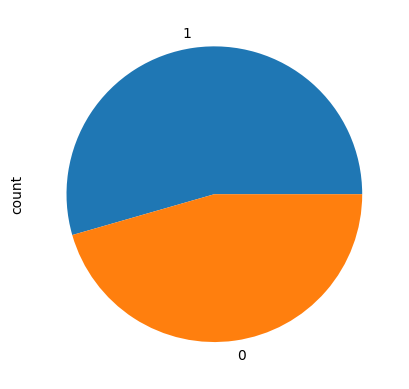

In [26]:
# Check if our dataset is balanced
df.target.value_counts().plot(kind="pie", color=["red", "blue"]);

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
# Are there any missing values in any column of our dataframe?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Frequency according to Sex

In [31]:
df.sex.value_counts() # In this dataset males are 1 and females are 0

sex
1    207
0     96
Name: count, dtype: int64

In [56]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

# 75% of women have heart disease in this dataset
# 44.92% of men have heart disease in this dataset
# (72 + 93) / (96 + 207) # 54.455% of all patients have heart disease

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Amount')

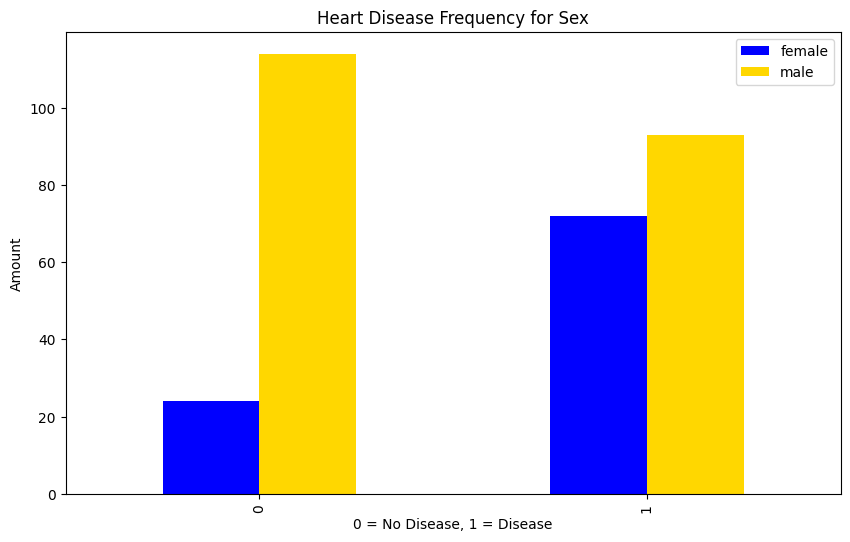

In [65]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["blue", "gold"], figsize=(10, 6))

plt.title("Heart Disease Frequency for Sex")
plt.legend(["female", "male"])
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")